# VAMOS A HACER UN DETECTOR DE IMÁGENES GENERICO, ES DECIR QUE SIRVA PARA CUALQUIER TIPO DE RECONOMICIENTO E IDENTIFICACIÓN DE IMÁGENES. VAMOS A ARMAR VARIAS FUNCIONES PARA LUEGO PODER USARLAS A FUTURO SIN TENER QUE CREAR NUEVOS CODIGOS. CON SOLO COPIAR Y PEGAR Y ARREGLANDO ALGUNAS QUE OTRAS LINEAS SE PUEDA USAR ESTAS FUNCIONES (tanto de cargar , crear modelo y hacer un análisis exhaustivo)

In [1]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

* # Carga de datos no estructurados ( en este caso son imágenes de personas, animales y autos)


* Definimos las rutas de las carpetas.

In [8]:
root_folder = "/Users/Acer/Desktop/detector-cosas/"
training_folder = os.path.join(root_folder, "images" , "training")
testing_folder = os.path.join(root_folder,"images" , "testing")

In [9]:
#### Categorías y etiquetas
categories = ["autos" , "gatos" , "perros" , "personas"]
num_classes = len(categories)

---
* # Análisis sobre los datos no estructurados que tenemos, en este caso sobre imágenes.

In [67]:
main_folder = "/Users/Acer/Desktop/detector-cosas/images/"

In [72]:
def visualizar_imagenes_conteo(folder):
    fig = plt.figure(figsize=(12,6))
    
    for i , category in enumerate(categories):
        category_folder = os.path.join(folder, category)
        image_files = os.listdir(category_folder)
        num_images = len(image_files)
        
        ### Tomar imágenes aleatorias
        random_image_file = random.choice(image_files)
        image_path = os.path.join(category_folder, random_image_file)
        image = plt.imread(image_path)
        
        ### Mostramos la imágenes
        ax = fig.add_subplot(1,4, i+1)
        ax.imshow(image)
        ax.set_title(category)
        ax.axis('off')
        
        ### Cantidad de imagenes en cada carpeta
        ax.text(0.5, -0.1, f'{num_images} imágenes', transform=ax.transAxes, ha='center')
    plt.tight_layout()
    plt.show()

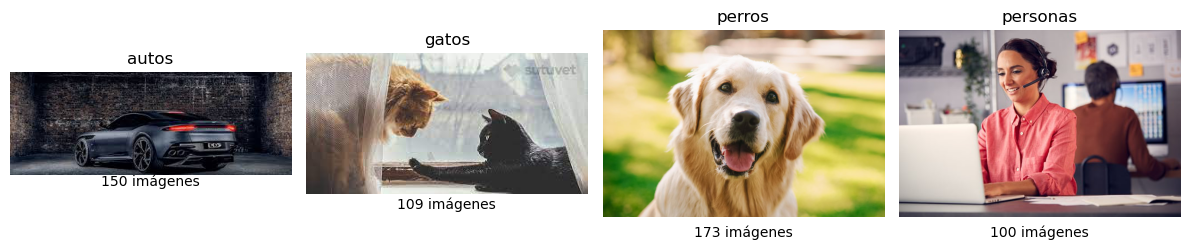

In [78]:
visualizar_imagenes_conteo(os.path.join(main_folder, 'training'))

* ## Contenemos 4 carpetas con imagenes de distinto tamaño y tipo
----

In [12]:
#### Creamos una función para cargar las imágenes de cada categoria y pasarla a Numpy array 

def load_images(folder):
    images = []
    labels = []
    
    for category in categories:
        category_folder = os.path.join(folder, category)
        for filename in os.listdir(category_folder):
            img_path = os.path.join(category_folder, filename)
            img = Image.open(img_path)
            img = img.resize((90,90)) # Redimension de las imáganes
            if img.mode != "RGB":
                img = img.convert("RGB")
                
            img_array = np.array(img)
            images.append(img_array)
            labels.append(categories.index(category))
    
    images = np.array(images)
    labels = np.array(labels)
    return images , labels

In [13]:
#### Cargamos los datos de entrenamiento y prueba
train_images , train_labels = load_images(training_folder)
test_images , test_labels = load_images(testing_folder)

In [14]:
#### normalizamos los pixeles para tener los valores entre 0 y 1
train_images = train_images / 255.0
test_images = test_images / 255.0

-----
* # Creamos el modelo de la red neuronal

In [19]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(90, 90, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
model.fit(train_images, train_labels, epochs=10, batch_size=32)

Epoch 1/10
17/17 [==============================] - 4s 161ms/step - loss: 3.6007 - accuracy: 0.3271
Epoch 2/10
17/17 [==============================] - 3s 165ms/step - loss: 1.1855 - accuracy: 0.5207
Epoch 3/10
17/17 [==============================] - 3s 150ms/step - loss: 0.9625 - accuracy: 0.6654
Epoch 4/10
17/17 [==============================] - 3s 157ms/step - loss: 0.7242 - accuracy: 0.7368
Epoch 5/10
17/17 [==============================] - 3s 160ms/step - loss: 0.4944 - accuracy: 0.8346
Epoch 6/10
17/17 [==============================] - 3s 156ms/step - loss: 0.3690 - accuracy: 0.9004
Epoch 7/10
17/17 [==============================] - 3s 172ms/step - loss: 0.2511 - accuracy: 0.9492
Epoch 8/10
17/17 [==============================] - 3s 183ms/step - loss: 0.1915 - accuracy: 0.9586
Epoch 9/10
17/17 [==============================] - 3s 152ms/step - loss: 0.1196 - accuracy: 0.9812
Epoch 10/10
17/17 [==============================] - 3s 150ms/step - loss: 0.1051 - accuracy: 0.9793

* ### Podemos observar que el modelo es verdaderamente muy bueno. Tiene un %98 de eficacia en la predicción
-----

----
* # Visualizacion del comportamiento y eficacia del modelo

In [22]:
import random 
import matplotlib.pyplot as plt

In [30]:
#### creamos otra función para de paso poder usarla a futuro en otros trabajos de ciencia de datos e identificaciones de imágenes
def predict_and_visualize(model, images, labels):
    fig = plt.figure(figsize=(12,8))
    
    for i in range(30):
        index = random.randint(0,len(images) - 1)
        image = images[index]
        label = labels[index]
        
        prediction = model.predict(np.expand_dims(image,axis=0))
        predicted_label = np.argmax(prediction)
        
        ax = fig.add_subplot(5 , 6 , i+1)
        ax.imshow(image)
        
        if predicted_label == label: 
            ax.set_title(categories[predicted_label] , color="green")
        else:
            ax.set_title(categories[predicted_label] , color="red")
        ax.axis("off")
        
    plt.tight_layout()
    plt.show()

1/1 [==============================] - 0s 23ms/step


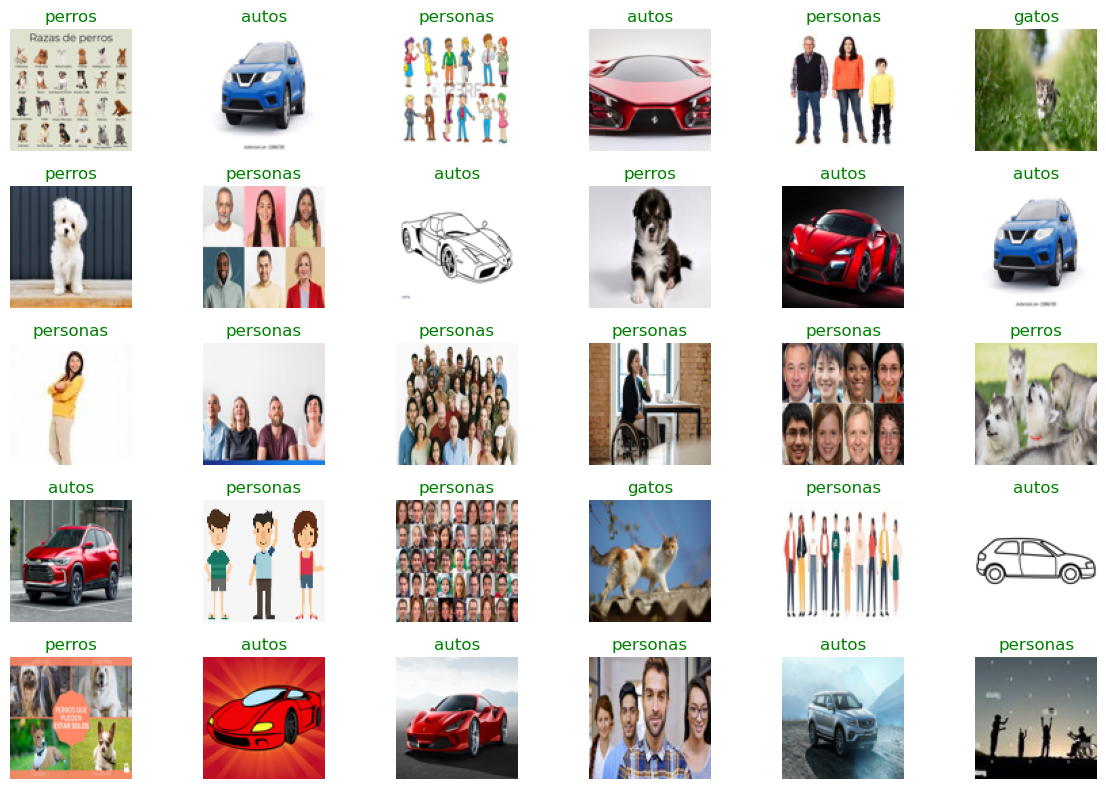

In [31]:
predict_and_visualize(model , test_images ,test_labels)

* ### Aca se puede observar que de las 30 imágenes elegidas aleatoriamente no tenemos ningun error, es decir que predice perfectamente que tipo de imágen es, si es de personas, autos, perros o gatos.
----

---
* # Vamos a visualizar de manera mas clara la eficacia del modelo

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
#### Realizar predicciones en el conjunto de imágenes de prueba
predictions = model.predict(train_images)
predicted_labels = np.argmax(predictions, axis=1)

17/17 [==============================] - 1s 44ms/step


In [54]:
accuracy = accuracy_score(train_labels, predicted_labels)
print("Precisión del modelo: {:.2%}".format(accuracy))

Precisión del modelo: 99.25%


* # Tenemos una predicción casi perfecta, con una eficacia del %99.25 (hacemos nuevamente un test sobre las imágenes de entrenamiento por que con las imágenes de training nos da una eficacia del %100 , eso pasa por que contiene pocas imágenes cargadas)
----

----
* # Visualización

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [56]:
### Calculamos la matriz de confusión
confusion = confusion_matrix(train_labels , predicted_labels)

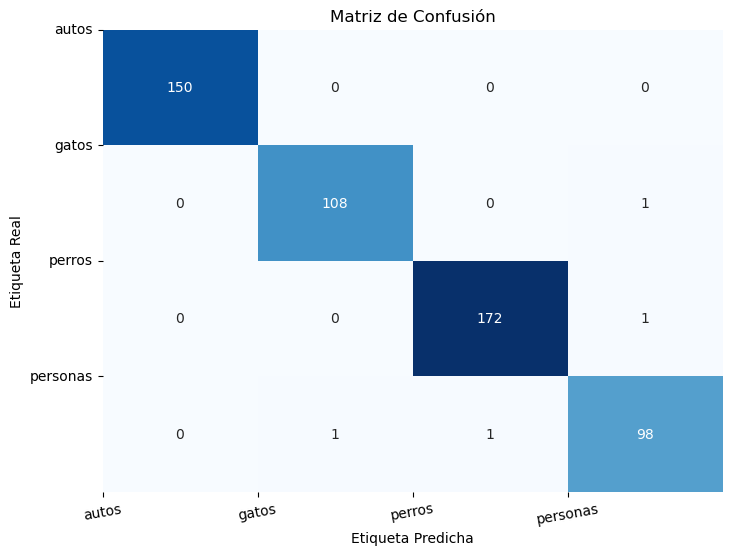

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion ,annot=True , fmt="d", cmap="Blues" , cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Real")
plt.xticks(np.arange(num_classes), categories, rotation=10)
plt.yticks(np.arange(num_classes), categories , rotation=0)
plt.show()

* ### Vemos que el modelo tiene un error muy minimo, casi nulo por asi decirlo
    * ### El unico error que tiene es que predijo que era en dos imagenes de personas un perro o un gato. puede ser por la parte de los ojos la confusión. pero el modelo es excelente
---

* # EN RESUMEN EL MODELO ES VERDADERAMENTE MUY BUENO, CONTAMOS CON UNA EFICACIA EN LA PREDICCIÓN DEL %99. LUEGO VOY A AGREGAR MAS TIPOS DE IMÁGENES Y MUCHOS MAS DATOS